## Предварительный анализ 
### Загрузим необходимые библиотеки 

In [1]:
from io import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.svm import NuSVR
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./lab4/country_wise_latest.csv')

### Изучим полученные данные

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [4]:
df = df[['New cases', 'New deaths', 'New recovered']]
df.info()
X = df.drop(['New deaths'], axis = 1)
y = df['New deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   New cases      187 non-null    int64
 1   New deaths     187 non-null    int64
 2   New recovered  187 non-null    int64
dtypes: int64(3)
memory usage: 4.5 KB


In [5]:
#1. Модель бэггинга - случайный лес (Random Forest):

from sklearn.ensemble import RandomForestClassifier

# Создаем модель случайного леса с 100 деревьями
rf_model = RandomForestClassifier(n_estimators=50)

# Обучаем модель на тренировочных данных
rf_model.fit(X_train, y_train)

# Оцениваем качество модели на тестовых данных
accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

#2. Модель бустинга - градиентный бустинг (Gradient Boosting):

from sklearn.ensemble import GradientBoostingClassifier

# Создаем модель градиентного бустинга с 100 деревьями и скоростью обучения 0.1
gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1)

# Обучаем модель на тренировочных данных
gb_model.fit(X_train, y_train)

# Оцениваем качество модели на тестовых данных
accuracy = gb_model.score(X_test, y_test)
print("Accuracy:", accuracy)


#3. Модель стекинга - мета-классификатор на основе логистической регрессии:


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

# Обучаем базовые модели на тренировочных данных
rf_preds = cross_val_predict(rf_model, X_train, y_train, method='predict_proba')
gb_preds = cross_val_predict(gb_model, X_train, y_train, method='predict_proba')

# Создаем мета-классификатор на основе логистической регрессии
meta_model = LogisticRegression()

# Обучаем мета-классификатор на прогнозах базовых моделей
meta_model.fit(np.hstack([rf_preds, gb_preds]), y_train)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_test_preds = rf_model.predict_proba(X_test)
gb_model.fit(X_train, y_train)
gb_test_preds = gb_model.predict_proba(X_test)

# Оцениваем качество модели на тестовых данных

meta_test_preds = meta_model.predict_proba(np.hstack([rf_test_preds, gb_test_preds]))
accuracy = meta_model.score(np.hstack([rf_test_preds, gb_test_preds]), y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5
Accuracy: 0.39473684210526316
Accuracy: 0.4473684210526316


Accuracy of Bagging Classifier: 39.47%
Accuracy of Random Forest Classifier: 50.00%
Accuracy of Stacking: 44.74%


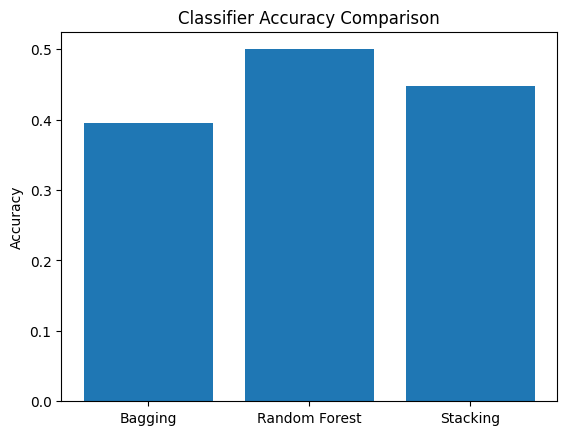

In [6]:

# Создаем три модели: решающее дерево, бэггинг и случайный лес

bg = gb_model
rf = rf_model

# Обучаем модели на обучающей выборке

bg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Получаем предсказания на тестовой выборке

bg_pred = bg.predict(X_test)
rf_pred = rf.predict(X_test)

# Вычисляем точность предсказания каждой модели

bg_acc = accuracy_score(y_test, bg_pred)
rf_acc = accuracy_score(y_test, rf_pred)

# Выводим точность каждой модели на экран

print("Accuracy of Bagging Classifier: {:.2f}%".format(bg_acc*100))
print("Accuracy of Random Forest Classifier: {:.2f}%".format(rf_acc*100))
print("Accuracy of Stacking: {:.2f}%".format(accuracy*100))

# Создаем график точности предсказания каждой модели
models = [ 'Bagging', 'Random Forest', 'Stacking']
accuracies = [ bg_acc, rf_acc, accuracy]
plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.show()
